In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
npo_df=pd.read_csv('Country-data.csv')
npo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
npo_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
npo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
npo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
npo_df['child_mort'].max()

208.0

In [14]:
npo_df.loc[npo_df['child_mort'] == 208 , :]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


In [15]:
npo_df['health'].min()

1.81

In [16]:
npo_df.loc[npo_df['health'] == 1.81 , :]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


**We will reduce the columns for the purpose of the problem to include "Child mortality, Health, Life expectancy, Income and Inflation", since these columns are indicators for our study.**

In [17]:
npo_df1=npo_df.loc[:,["child_mort","health", "life_expec","income","inflation"]]

**Now, let us go ahead and create a dataframe with normalization for all of the given features**

In [24]:
from sklearn import preprocessing

In [25]:
#norm=Normalizer()
X = preprocessing.normalize(npo_df1)

In [27]:
X = pd.DataFrame(X)

In [28]:
X.describe()

,0,1,2,3,4
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.017657,0.001551,0.014194,0.998991,0.002032
std,0.034421,0.002524,0.017050,0.002941,0.004010
min,0.000031,0.000014,0.000636,0.977516,-0.000206
25%,0.000314,0.000308,0.003282,0.999641,0.000104
50%,0.002228,0.000597,0.007150,0.999971,0.000580
75%,0.018714,0.001614,0.018734,0.999994,0.002178
max,0.186194,0.016657,0.092294,1.000000,0.033386


# KMeans clustering

C:\Users\Dilip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.25009281016911844
0.07123501734599887
0.0334114547980828
0.02074111149308584
0.016666388519194632
0.012930842288218305
0.01057246635501103
0.008908358885922023
0.007462851609862054
0.006532215235213402


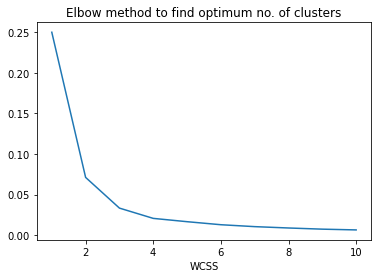

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method to find optimum no. of clusters')
plt.xlabel('WCSS')
plt.show()

**It appears that the optimum number of clusters for this problem is 3; therefore creating the KMeans model using that value**

In [30]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_means=kmeans.fit_predict(X)

In [31]:
type(y_means)

numpy.ndarray

In [32]:
Categ_df=pd.DataFrame(data=y_means,columns=["Category"])

In [33]:
Final_df=npo_df.join(Categ_df)

In [36]:
#Final_df.info()
Final_df["country"].groupby(Final_df["Category"]).count()

Category
0     25
1      8
2    134
Name: country, dtype: int64

In [42]:
Final_df.loc[(Final_df["Category"]==1), ["country","child_mort","health", "life_expec","income","inflation"]]

,country,child_mort,health,life_expec,income,inflation
26,Burundi,93.6,11.60,57.7,764,12.30
31,Central African Republic,149.0,3.98,47.5,888,2.01
37,"Congo, Dem. Rep.",116.0,7.91,57.5,609,20.80
66,Haiti,208.0,6.91,32.1,1500,5.45
88,Liberia,89.3,11.80,60.8,700,5.47
106,Mozambique,101.0,5.21,54.5,918,7.64
112,Niger,123.0,5.16,58.8,814,2.55
132,Sierra Leone,160.0,13.10,55.0,1220,17.20


In [43]:
Final_df.loc[(Final_df["Category"]==0), ["country","child_mort","health", "life_expec","income","inflation"]]

,country,child_mort,health,life_expec,income,inflation
0,Afghanistan,90.2,7.58,56.2,1610,9.440
17,Benin,111.0,4.10,61.8,1820,0.885
25,Burkina Faso,116.0,6.74,57.9,1430,6.810
28,Cameroon,108.0,5.13,57.3,2660,1.910
32,Chad,150.0,4.53,56.5,1930,6.390
36,Comoros,88.2,4.51,65.9,1410,3.870
40,Cote d'Ivoire,111.0,5.30,56.3,2690,5.390
50,Eritrea,55.2,2.66,61.7,1420,11.600
56,Gambia,80.3,5.69,65.5,1660,4.300
63,Guinea,109.0,4.93,58.0,1190,16.100


In [45]:
Final_df.loc[(Final_df["Category"]==0, 'income')].mean()

1810.0

In [46]:
Final_df.loc[(Final_df["Category"]==1, 'income')].mean()

926.625

In [47]:
Final_df.loc[(Final_df["Category"]==2, 'income')].mean()

20973.880597014926

**As seen above, the algorithm has classified the generally accepted "poor" countries in the category '1', the "somewhat poor" countries in category '0' and the others in category '2'.**

# Agglomerative Hierarchical Clustering

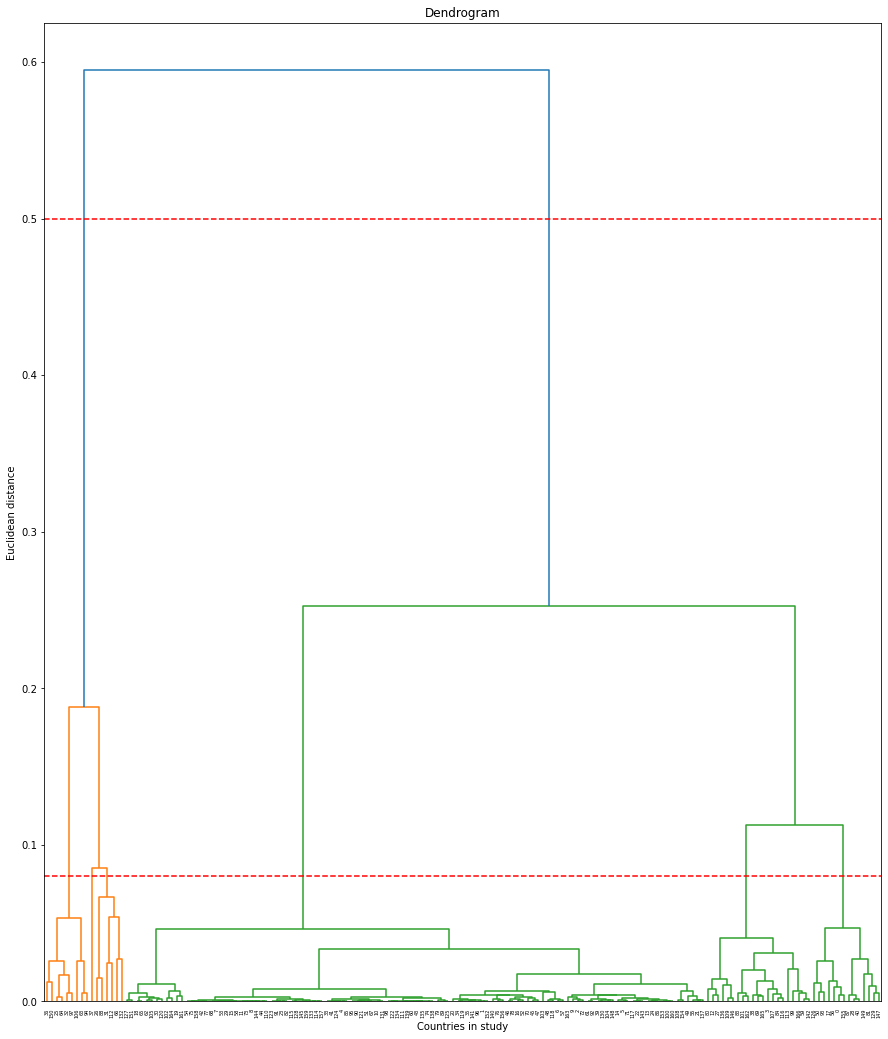

In [55]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,18))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Countries in study')
plt.ylabel('Euclidean distance')
plt.hlines(0.5,0,5000, colors="r", linestyles="dashed")
plt.hlines(0.08,0,5000, colors="r", linestyles="dashed")
plt.show()

**The first obvious clustering seems to be with the number of clusters at 2, and the next one seems to be with number of clusters as 6. Let us try with both**

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [57]:
type(y_hc)

numpy.ndarray

In [59]:
CategHC_2_df=pd.DataFrame(data=y_hc,columns=["Category_HC_2"])

In [60]:
Final_HC_2_df=npo_df.join(CategHC_2_df)

In [62]:
Final_HC_2_df["country"].groupby(Final_HC_2_df["Category_HC_2"]).count()

Category_HC_2
0    151
1     16
Name: country, dtype: int64

**Here the number of countries in the category '1' is 16. Let us have a look at those countries**

In [64]:
Final_HC_2_df.loc[(Final_HC_2_df["Category_HC_2"]==1), ["country","child_mort","health", "life_expec","income","inflation"]]

,country,child_mort,health,life_expec,income,inflation
25,Burkina Faso,116.0,6.74,57.9,1430,6.81
26,Burundi,93.6,11.60,57.7,764,12.30
31,Central African Republic,149.0,3.98,47.5,888,2.01
32,Chad,150.0,4.53,56.5,1930,6.39
36,Comoros,88.2,4.51,65.9,1410,3.87
37,"Congo, Dem. Rep.",116.0,7.91,57.5,609,20.80
63,Guinea,109.0,4.93,58.0,1190,16.10
64,Guinea-Bissau,114.0,8.50,55.6,1390,2.97
66,Haiti,208.0,6.91,32.1,1500,5.45
88,Liberia,89.3,11.80,60.8,700,5.47


In [66]:
Final_HC_2_df.loc[(Final_HC_2_df["Category_HC_2"]==1, 'income')].mean()

1179.5625

In [67]:
Final_HC_2_df.loc[(Final_HC_2_df["Category_HC_2"]==0, 'income')].mean()

18836.35761589404

**It is evident that the categorization has brought out the income differences as seen by the mean**

# AHC with n=6

In [68]:
from sklearn.cluster import AgglomerativeClustering
hc6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_hc6 = hc6.fit_predict(X)

In [69]:
CategHC_6_df=pd.DataFrame(data=y_hc6,columns=["Category_HC_6"])
Final_HC_6_df=npo_df.join(CategHC_6_df)
Final_HC_6_df["country"].groupby(Final_HC_6_df["Category_HC_6"]).count()

Category_HC_6
0      6
1      9
2    116
3     14
4     21
5      1
Name: country, dtype: int64

In [83]:
print(Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==0, ["country","child_mort","health", "life_expec","income","inflation"])])
print("Mean income",Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==0, "income")].mean(), flush=False)

                      country  child_mort  health  life_expec  income  \
26                    Burundi        93.6   11.60        57.7     764   
31   Central African Republic       149.0    3.98        47.5     888   
66                      Haiti       208.0    6.91        32.1    1500   
88                    Liberia        89.3   11.80        60.8     700   
112                     Niger       123.0    5.16        58.8     814   
132              Sierra Leone       160.0   13.10        55.0    1220   

     inflation  
26       12.30  
31        2.01  
66        5.45  
88        5.47  
112       2.55  
132      17.20  
Mean income 981.0


In [81]:
print(Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==1, ["country","child_mort","health", "life_expec","income","inflation"])])
print("Mean income",Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==1, "income")].mean(), flush=False)

           country  child_mort  health  life_expec  income  inflation
25    Burkina Faso       116.0    6.74        57.9    1430       6.81
32            Chad       150.0    4.53        56.5    1930       6.39
36         Comoros        88.2    4.51        65.9    1410       3.87
63          Guinea       109.0    4.93        58.0    1190      16.10
64   Guinea-Bissau       114.0    8.50        55.6    1390       2.97
94          Malawi        90.5    6.59        53.1    1030      12.10
97            Mali       137.0    4.98        59.5    1870       4.37
106     Mozambique       101.0    5.21        54.5     918       7.64
150           Togo        90.3    7.65        58.7    1210       1.18
Mean income 1375.3333333333333


In [82]:
print(Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==3, ["country","child_mort","health", "life_expec","income","inflation"])])
print("Mean income",Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==3, "income")].mean(), flush=False)

           country  child_mort  health  life_expec  income  inflation
0      Afghanistan        90.2    7.58        56.2    1610      9.440
17           Benin       111.0    4.10        61.8    1820      0.885
28        Cameroon       108.0    5.13        57.3    2660      1.910
40   Cote d'Ivoire       111.0    5.30        56.3    2690      5.390
50         Eritrea        55.2    2.66        61.7    1420     11.600
56          Gambia        80.3    5.69        65.5    1660      4.300
81        Kiribati        62.7   11.30        60.7    1730      1.520
87         Lesotho        99.7   11.10        46.5    2380      4.150
93      Madagascar        62.2    3.77        60.8    1390      8.790
126         Rwanda        63.6   10.50        64.6    1350      2.610
129        Senegal        66.8    5.66        64.0    2180      1.850
147       Tanzania        71.9    6.01        59.3    2090      9.250
149    Timor-Leste        62.6    9.12        71.1    1850     26.500
155         Uganda  

In [84]:
print(Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==4, ["country","child_mort","health", "life_expec","income","inflation"])])
print("Mean income",Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==4, "income")].mean(), flush=False)

                   country  child_mort  health  life_expec  income  inflation
3                   Angola       119.0    2.85        60.1    5900      22.40
12              Bangladesh        49.4    3.52        70.4    2440       7.14
27                Cambodia        44.4    5.68        66.1    2520       3.12
38             Congo, Rep.        63.9    2.46        60.4    5190      20.70
59                   Ghana        74.7    5.22        62.2    3060      16.60
69                   India        58.8    4.05        66.2    4410       8.98
80                   Kenya        62.2    4.75        62.8    2480       2.09
83         Kyrgyz Republic        29.6    6.18        68.5    2790      10.00
84                     Lao        78.9    4.47        63.8    3980       9.20
99              Mauritania        97.4    4.41        68.2    3320      18.90
101  Micronesia, Fed. Sts.        40.0   14.20        65.4    3340       3.80
107                Myanmar        64.4    1.97        66.8    37

In [85]:
print(Final_HC_6_df.loc[(Final_HC_6_df["Category_HC_6"]==5, ["country","child_mort","health", "life_expec","income","inflation"])])

             country  child_mort  health  life_expec  income  inflation
37  Congo, Dem. Rep.       116.0    7.91        57.5     609       20.8


**To summarize, from analyzing the dataset on the socio-economic conditions, and limiting the number of countries for receiving aid to 10, the following would be a possible list**
**"Congo, Dem. Rep.", Burundi,Central African Republic,Haiti,Liberia, Niger, Sierra Leone, Malawi, Mozambique and Burkina Faso**
